### Start with imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### 1. Load Data

In [2]:
df = pd.read_csv('data/data.csv', encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")


### 2. Explore Data Set

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### 3. Missing Data

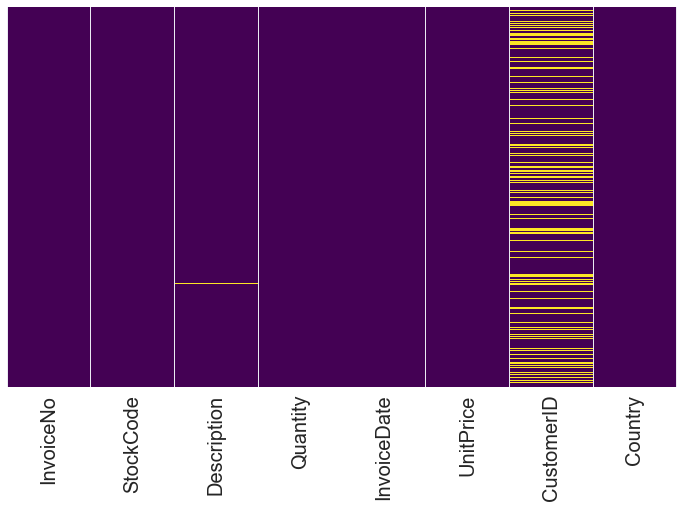

In [6]:
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

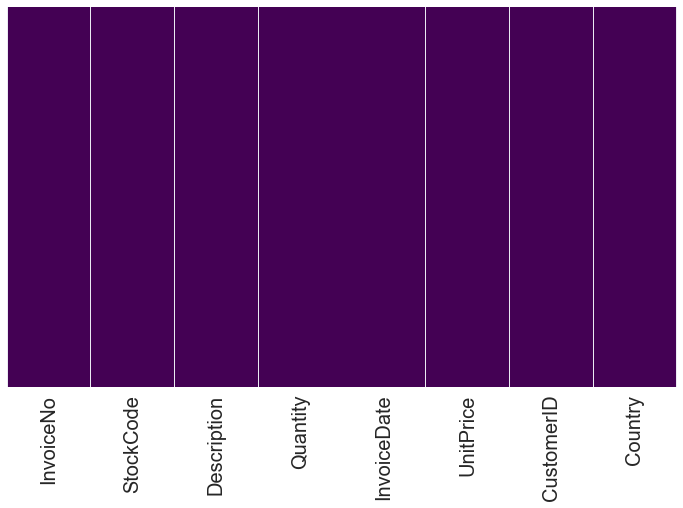

In [7]:
df = df[pd.notnull(df['CustomerID'])] 
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### 4. Feature Engineering
### 4.1 Weekday

In [9]:
df['weekday'] = pd.to_datetime(df['InvoiceDate'], errors='coerce').dt.dayofweek

**Day to number mapping:**
> * **Monday**: `0`
* **Tuesday**: `1`
* **Wednesday**: `2`
* **Thursday**: `3`
* **Friday**: `4`
* **Saturday**: `5`
* **Sunday**: `6`

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


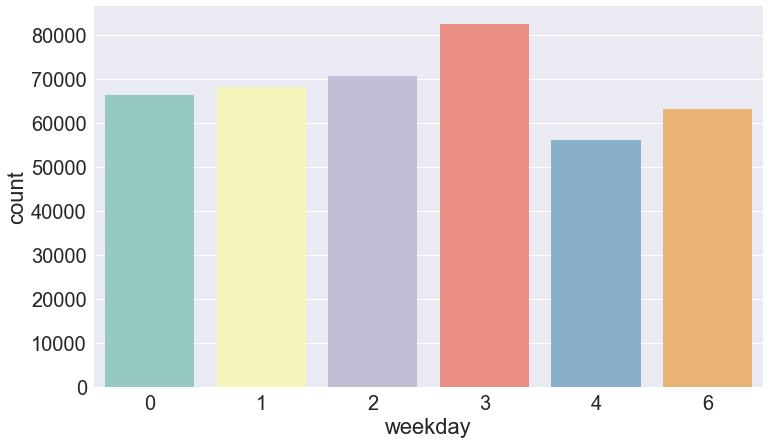

In [10]:
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.countplot(x=df['weekday'], palette="Set3")

### 4.2 Total Price

In [11]:
df['Total Price'] = df['Quantity'] * df['UnitPrice'] 

In [12]:
df['Total Price'].describe()

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Total Price, dtype: float64

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


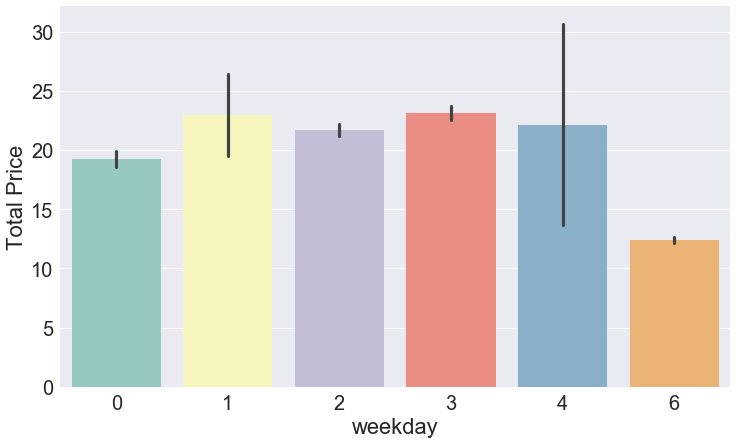

In [13]:
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.barplot(x='weekday', y='Total Price', data=df, palette="Set3")

### 4.3 Build a customer table
### 4.3.1 Invoice Count

In [14]:
invoice_count = df.groupby(by="CustomerID", as_index=False)['InvoiceNo'].count()
invoice_count.columns = ['CustomerID', 'NumberOrders']
invoice_count.describe()

,NumberOrders
count,4372.000000
mean,93.053294
std,232.471608
min,1.000000
25%,17.000000
50%,42.000000
75%,102.000000
max,7983.000000


### 4.3.2 Total Amount Each Customer Has Spent

In [15]:
total_spent = df.groupby(by="CustomerID", as_index=False)['Total Price'].sum()
total_spent.columns = ['CustomerID', 'total_spent']
total_spent.describe()

,total_spent
count,4372.000000
mean,1898.459701
std,8219.345141
min,-4287.630000
25%,293.362500
50%,648.075000
75%,1611.725000
max,279489.020000


### 4.3.3 How many Items each user has bought

In [16]:
total_items = df.groupby(by="CustomerID", as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'NumberItems']
total_items.describe()

,NumberItems
count,4372.000000
mean,1122.344007
std,4672.790720
min,-303.000000
25%,153.000000
50%,365.000000
75%,962.250000
max,196719.000000


### 4.3.4 First Order and Number of Days as a Customer

In [17]:
earliest_order = df.groupby(by="CustomerID", as_index=False)['InvoiceDate'].min()
earliest_order.columns = ['CustomerID', 'EarliestInvoice']
earliest_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
earliest_order['days_as_customer'] = 1 + (earliest_order.now - earliest_order.EarliestInvoice).astype('timedelta64[D]')
earliest_order.drop('now', axis=1, inplace=True)
earliest_order.head(20)

,CustomerID,EarliestInvoice,days_as_customer
0,12346,2011-01-18 10:01:00,326.0
1,12347,2010-12-07 14:57:00,367.0
2,12348,2010-12-16 19:09:00,358.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0
5,12352,2011-02-16 12:33:00,297.0
6,12353,2011-05-19 17:47:00,204.0
7,12354,2011-04-21 13:11:00,232.0
8,12355,2011-05-09 13:49:00,214.0
9,12356,2011-01-18 09:50:00,326.0


### 4.3.5 Last Order and Days Since Last Purchase

In [18]:
last_order = df.groupby('CustomerID', as_index=False)['InvoiceDate'].max()
last_order.columns = ['CustomerID', 'last_purchase']
last_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
last_order['days_since_purchase'] = 1 + (last_order.now - last_order.last_purchase).astype('timedelta64[D]')
last_order.drop('now', axis=1, inplace=True)
last_order.head(20)

,CustomerID,last_purchase,days_since_purchase
0,12346,2011-01-18 10:17:00,326.0
1,12347,2011-12-07 15:52:00,2.0
2,12348,2011-09-25 13:13:00,75.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0
5,12352,2011-11-03 14:37:00,36.0
6,12353,2011-05-19 17:47:00,204.0
7,12354,2011-04-21 13:11:00,232.0
8,12355,2011-05-09 13:49:00,214.0
9,12356,2011-11-17 08:40:00,23.0


### 4.3.6 Combine Columns into Customer Table

In [19]:
import functools
dfs = [total_spent, invoice_count, earliest_order, last_order, total_items]
CustomerTable = functools.reduce(lambda left, right: pd.merge(left, right, on='CustomerID', how='outer'), dfs)
CustomerTable.head(20)

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197
5,12352,1545.41,95,2011-02-16 12:33:00,297.0,2011-11-03 14:37:00,36.0,470
6,12353,89.00,4,2011-05-19 17:47:00,204.0,2011-05-19 17:47:00,204.0,20
7,12354,1079.40,58,2011-04-21 13:11:00,232.0,2011-04-21 13:11:00,232.0,530
8,12355,459.40,13,2011-05-09 13:49:00,214.0,2011-05-09 13:49:00,214.0,240
9,12356,2811.43,59,2011-01-18 09:50:00,326.0,2011-11-17 08:40:00,23.0,1591


### 5.0 Statistical Analysis
### 5.1 How many Customers?

In [20]:
len(CustomerTable)

4372

### 5.2 Basic Statistics

In [21]:
CustomerTable.describe()

,total_spent,NumberOrders,days_as_customer,days_since_purchase,NumberItems
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,225.779048,92.047118,1122.344007
std,8219.345141,232.471608,118.412473,100.765435,4672.790720
min,-4287.630000,1.000000,1.000000,1.000000,-303.000000
25%,293.362500,17.000000,115.000000,17.000000,153.000000
50%,648.075000,42.000000,253.000000,50.000000,365.000000
75%,1611.725000,102.000000,332.000000,143.000000,962.250000
max,279489.020000,7983.000000,374.000000,374.000000,196719.000000


### 5.3 Find Big Spenders, Lots of Orders, Long-time customers, Dormant Customers
This will then be utilized in a sales and marketing campaign! 

In [22]:
def big_spender(row):
    if row['total_spent'] >= 1611.725:          # threshold based on 75th percentile
        return 'Yes'
    else:
        return 'No'
    
def many_orders(row):
    if row['NumberOrders'] >= 102:              # threshold based on 75th percentile
        return 'Yes'
    else:
        return 'No'
    
def loyal_customer(row):
    if row['days_as_customer'] >= 332:          # threshold based on 75th percentile
        return 'Yes'
    else: 
        return 'No'
    
def dormant_customer(row):
    if row['days_since_purchase'] >= 115:       # threshold based on 25th percentile
        return 1
    else:
        return 0
    
CustomerTable['BigSpender'] = CustomerTable.apply(big_spender, axis=1)
CustomerTable['ManyOrders'] = CustomerTable.apply(many_orders, axis=1)
CustomerTable['LoyalCustomer'] = CustomerTable.apply(loyal_customer, axis=1)
CustomerTable['DormantCustomer'] = CustomerTable.apply(dormant_customer, axis=1)

CustomerTable['OrderFrequency'] = CustomerTable['NumberOrders']/CustomerTable['days_as_customer']

CustomerTable.head()    

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0,No,No,No,1,0.006135
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458,Yes,Yes,Yes,0,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341,Yes,No,Yes,0,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631,Yes,No,No,0,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197,No,No,No,1,0.054839


### 5.4 Look at distributions and relationships

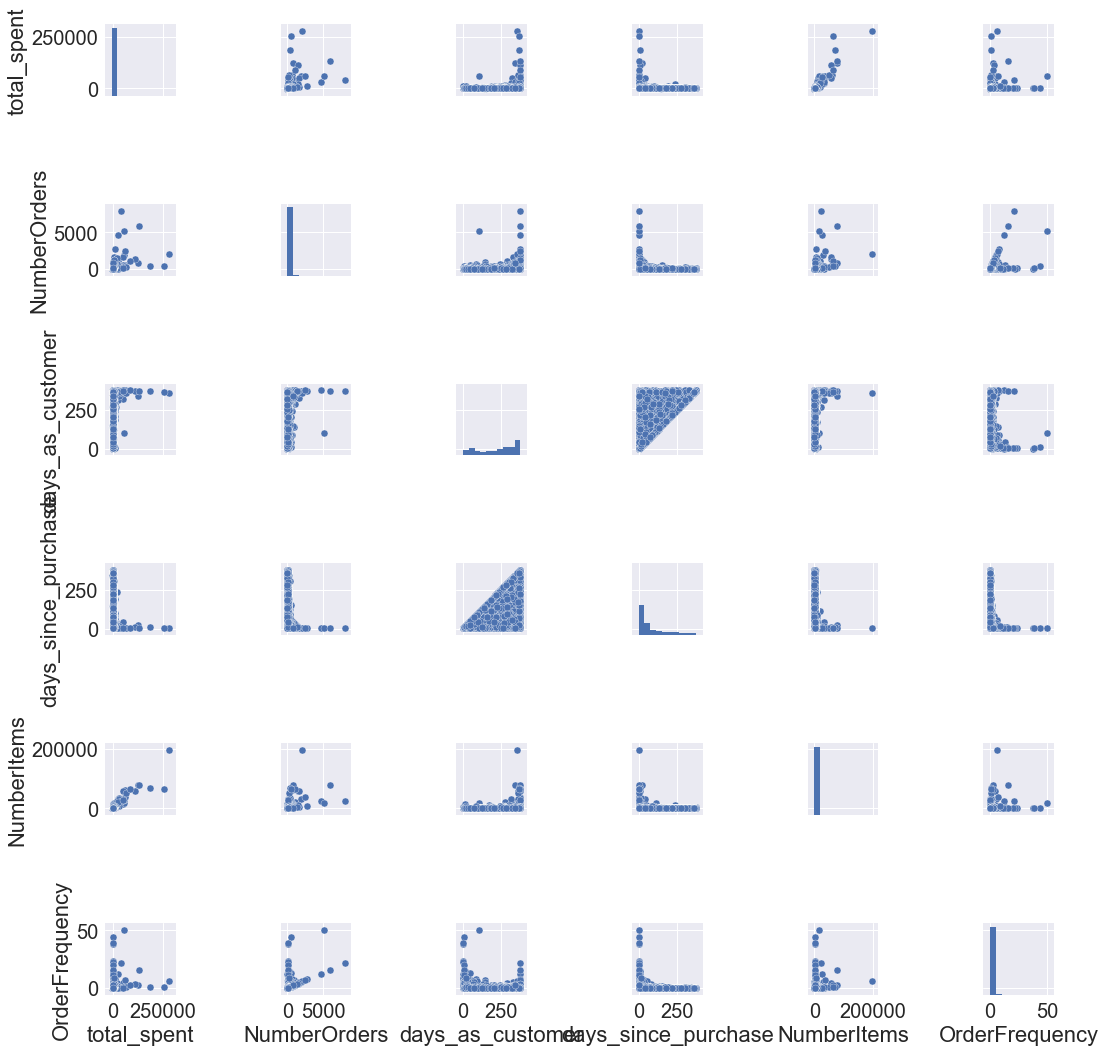

In [23]:
sns.pairplot(CustomerTable, vars=['total_spent', 'NumberOrders', 'days_as_customer', 
                                 'days_since_purchase', 'NumberItems', 'OrderFrequency'])

In [24]:
CustomerTable.head()

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0,No,No,No,1,0.006135
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458,Yes,Yes,Yes,0,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341,Yes,No,Yes,0,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631,Yes,No,No,0,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197,No,No,No,1,0.054839


In [25]:
CustomerTable.describe()

,total_spent,NumberOrders,days_as_customer,days_since_purchase,NumberItems,DormantCustomer,OrderFrequency
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,225.779048,92.047118,1122.344007,0.289799,0.613840
std,8219.345141,232.471608,118.412473,100.765435,4672.790720,0.453721,1.803834
min,-4287.630000,1.000000,1.000000,1.000000,-303.000000,0.000000,0.002674
25%,293.362500,17.000000,115.000000,17.000000,153.000000,0.000000,0.096602
50%,648.075000,42.000000,253.000000,50.000000,365.000000,0.000000,0.254717
75%,1611.725000,102.000000,332.000000,143.000000,962.250000,1.000000,0.583333
max,279489.020000,7983.000000,374.000000,374.000000,196719.000000,1.000000,50.274510


https://www.kaggle.com/carrie1/customer-insights
Leaving off: need to find time between purchases for each customer, get 75th percentile
* Create data of past past 10 purchases for all customers, fill in average for those not seen yet
* also include and days and customer potentially, total spent, potentially at some point consider order freq

# Look at Relationships based on dormancy
## Total number of dormant customers

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


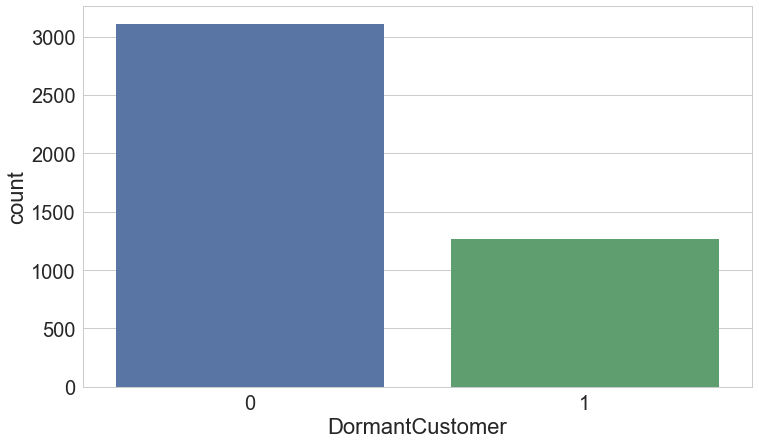

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.countplot(x='DormantCustomer', data=CustomerTable)

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


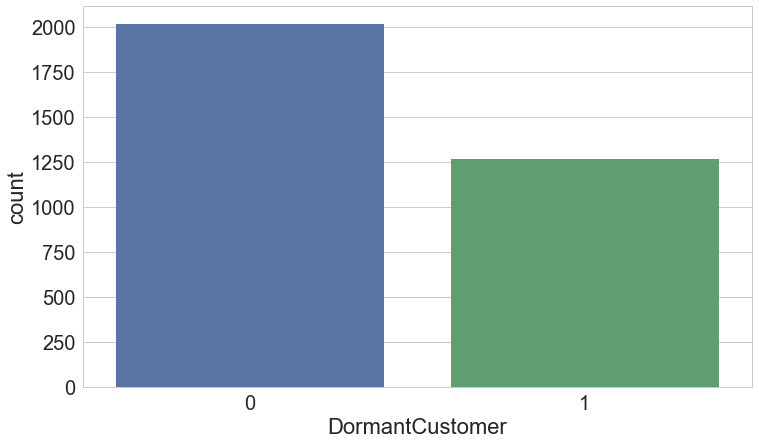

In [49]:
# filtering out the customers who are new
filteredTable = CustomerTable[CustomerTable['days_as_customer'] > 115]
filteredTable = filteredTable[["total_spent", "NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]
plt.figure(figsize=(12,7))
sns.countplot(x='DormantCustomer', data=filteredTable)

## Dormancy vs. Total Spent

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


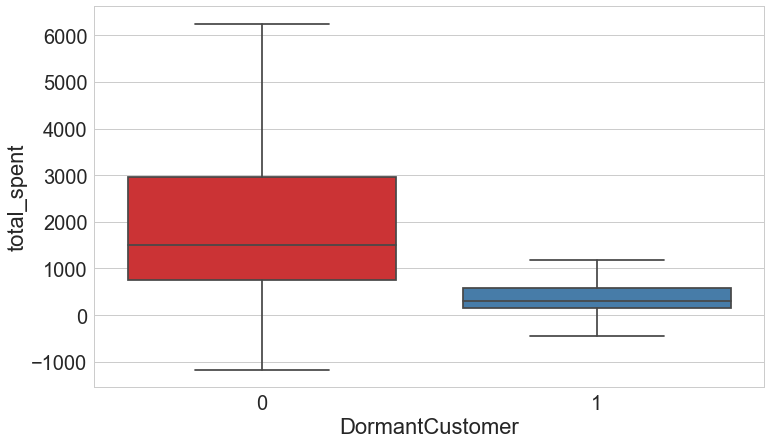

In [27]:
# filtering out the customers who are new
filteredTable = CustomerTable[CustomerTable['days_as_customer'] > 115]
filteredTable = filteredTable[["total_spent", "NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]
plt.figure(figsize=(12,7))
sns.boxplot(x="DormantCustomer", y="total_spent", data=filteredTable, palette='Set1', showfliers=False)

## Dormancy vs. Days as Customer

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


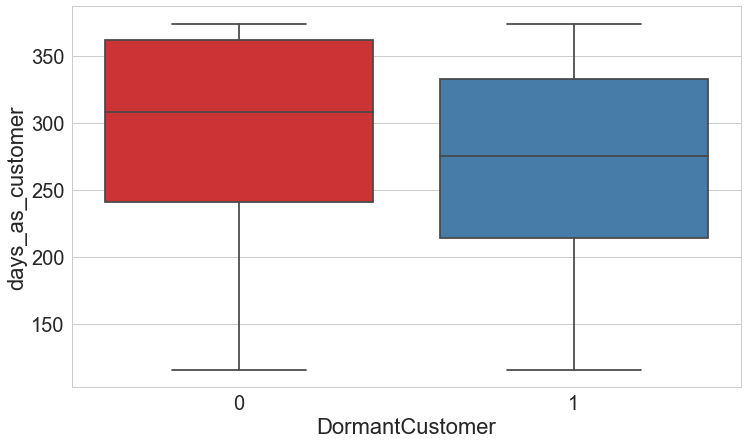

In [28]:
# filtering out the customers who are new
filteredTable = CustomerTable[CustomerTable['days_as_customer'] > 115]
filteredTable = filteredTable[["total_spent", "NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]
plt.figure(figsize=(12,7))
sns.boxplot(x="DormantCustomer", y="days_as_customer", data=filteredTable, palette='Set1', showfliers=False)

---
# Create our Preprocess/train/test/validate Script

In [29]:
"""
Preprocess script takes in a model (data frame) and the number of input features it has
It will shuffle the data, get the input features, create a train, validate, and test split
then perform smote oversampling to prevent 
"""
def preprocess(model, number_input_features):
    
    model = shuffle(model)                                   # shuffle
    features = model.columns[:number_input_features]         # get input features

    # train test split
    train, validate, test = np.split(model.sample(frac=1), 
                                     [int(.6*len(model)), 
                                      int(.8*len(model))])

    
    xtrain = train[features]
    ytrain = train['DormantCustomer']

    xvalidate = validate[features]
    yvalidate = validate['DormantCustomer']

    xtest = test[features]
    ytest = test['DormantCustomer']

    # Perform SMOTE oversampling on training set
    sm = SMOTE(random_state=12, ratio = 1.0)
    x_train, y_train = sm.fit_sample(xtrain, ytrain)
    
    return x_train, y_train, xvalidate, yvalidate, xtest, ytest, features

---
# Create Train/Prediction Script

In [30]:
def run_model(model, number_input_features):    
    # call preprocess function
    xtrain, ytrain, xvalidate, yvalidate, xtest, ytest, features = preprocess(model, number_input_features)

    # instantiate model and train
    clf = RandomForestClassifier(n_jobs=2, max_depth=6)
    clf.fit(xtrain, ytrain)

    # get validate and test predictions
    validation_predictions = clf.predict(xvalidate)
    test_predictions = clf.predict(xtest)
    
    # confusion matrix results for validation set
    cm_validate = confusion_matrix(yvalidate, validation_predictions, labels=[1, 0])
    get_metrics(cm_validate, 'Validate')
    
    # confusion matrix result for test set
    cm_test = confusion_matrix(ytest, test_predictions, labels=[1, 0])
    get_metrics(cm_test, 'Test')
    
    # feature importance
    print(list(zip(features, clf.feature_importances_)))

    # get validate and test predictions for probabilities
    validation_prediction_probabilities = clf.predict_proba(xvalidate)
    test_predictions_probabilities = clf.predict_proba(xtest)
    return validation_prediction_probabilities, yvalidate

# Create script to get confusion matrix metrics

In [31]:
def get_metrics(cm, set_type):               # set_type is either validation or test
    accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    precision = cm[0,0]/(cm[0,0]+cm[1,0])
    recall = cm[0,0]/(cm[0,0]+cm[0,1])
    print(f'{set_type} Accuracy: ', accuracy, 
          f'\n {set_type} Precision:', precision, 
          f'\n {set_type} Recall:', recall,
         '\n Confusion Matrix', cm)

---
# Define ML imports

In [32]:
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

---
# Prediction A - Baseline 
Let's try and predict whether a customer is going to go **dormant**. We will make use of the following input features when trying to make this prediction:
* **Number Of Orders**
* **Days as a Customer**
* **Number of Items Purchased**
* **Order Frequency**

Lets run model A.

In [33]:
model_A = CustomerTable[["NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]

# run model A and determine prediction outcomes
_, _ = run_model(model_A, 4)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validate Accuracy:  0.8329519450800915 
 Validate Precision: 0.6480263157894737 
 Validate Recall: 0.8347457627118644 
 Confusion Matrix [[197  39]
 [107 531]]
Test Accuracy:  0.8034285714285714 
 Test Precision: 0.611731843575419 
 Test Recall: 0.8690476190476191 
 Confusion Matrix [[219  33]
 [139 484]]
[('NumberOrders', 0.14037703162084297), ('days_as_customer', 0.23341945494735664), ('NumberItems', 0.0945039303154048), ('OrderFrequency', 0.5316995831163956)]


---
# Prediction B - Utilize Total Amount Spent 
Again, we are going to try and predict whether a customer is going to go **dormant**. We will make use of the following input features when trying to make this prediction:
* **Number Of Orders**
* **Days as a Customer**
* **Number of Items Purchased**
* **Order Frequency**
* **Total Amount Spent**

Lets run model B.

In [34]:
model_B = CustomerTable[["total_spent", "NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]

# run model A and determine prediction outcomes
_, _ = run_model(model_B, 5)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validate Accuracy:  0.8203661327231121 
 Validate Precision: 0.6171617161716172 
 Validate Recall: 0.8201754385964912 
 Confusion Matrix [[187  41]
 [116 530]]
Test Accuracy:  0.8411428571428572 
 Test Precision: 0.6666666666666666 
 Test Recall: 0.8699186991869918 
 Confusion Matrix [[214  32]
 [107 522]]
[('total_spent', 0.19317869229414578), ('NumberOrders', 0.09499191548992812), ('days_as_customer', 0.32761487844690945), ('NumberItems', 0.11190309310674396), ('OrderFrequency', 0.2723114206622726)]


Next step is to try and incorporate the most recent purchases into the input data and see how that effects the prediction results. 

---
# Prediction C - Look Into Probabilities 
Let's see how well our 90%+ dormant predictions actually hold up.


In [35]:
model_C = CustomerTable[["total_spent", "NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]

# run model A and determine prediction outcomes
validation_prob, validation_targets = run_model(model_C, 5)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validate Accuracy:  0.8032036613272311 
 Validate Precision: 0.6058823529411764 
 Validate Recall: 0.8442622950819673 
 Confusion Matrix [[206  38]
 [134 496]]
Test Accuracy:  0.8571428571428571 
 Test Precision: 0.7108433734939759 
 Test Recall: 0.8905660377358491 
 Confusion Matrix [[236  29]
 [ 96 514]]
[('total_spent', 0.10162711088720384), ('NumberOrders', 0.05079958884838145), ('days_as_customer', 0.22160883382921348), ('NumberItems', 0.09433051762573), ('OrderFrequency', 0.531633948809471)]


Let's now look at the predictions where the probably of dormant was over 90%. Then we want to see how many of those went dormant. 

In [38]:
# get total number of predictions made
print('Total number of predictions made: ', validation_prob.shape[0])

# get the indices where the probability of dormant is greater than 0.9, will be expecting a 1
indeces = np.where(validation_prob[:,1] > 0.8)[0]
print("Number of predictions with great than 80% probability: ", indeces.shape[0])

# turn the validation targets into an array 
val_targ_array = pd.Series.as_matrix(validation_targets)

# get the indeces from the target array that correspond to the indeces in the prediction 
# array were the probability was greater than 0.9. Then get the total number 
print("Accuracy when we state there is a 90% chance of dormancy: ", val_targ_array[indeces].sum() / val_targ_array[indeces].shape[0])

Total number of predictions made:  656
Number of predictions with great than 90% probability:  161
Accuracy when we state there is a 90% chance of dormancy:  0.8819875776397516


In [42]:
np.where(validation_prob[:,1] > 0.8)[0]

array([  1,   7,   9,  14,  19,  23,  25,  30,  33,  35,  37,  39,  45,
        51,  55,  64,  68,  70,  71,  76,  80,  83,  88,  96, 102, 106,
       108, 112, 115, 118, 119, 129, 131, 133, 139, 145, 163, 172, 178,
       181, 186, 187, 188, 191, 193, 203, 204, 206, 208, 210, 211, 212,
       213, 214, 219, 220, 225, 231, 233, 235, 244, 245, 246, 248, 254,
       256, 260, 263, 266, 267, 270, 272, 278, 288, 292, 294, 297, 298,
       308, 309, 314, 331, 334, 337, 339, 340, 343, 344, 345, 347, 348,
       349, 351, 366, 368, 371, 372, 375, 377, 380, 392, 394, 398, 404,
       414, 423, 428, 437, 440, 442, 449, 453, 458, 465, 471, 472, 475,
       479, 484, 486, 490, 495, 499, 500, 507, 508, 510, 512, 524, 534,
       539, 546, 547, 550, 564, 573, 575, 578, 580, 588, 589, 591, 594,
       596, 612, 614, 615, 616, 617, 618, 619, 623, 624, 635, 636, 638,
       641, 644, 648, 649, 650])

In [47]:
(val_targ_array[np.where(validation_prob[:,1] > 0.8)[0]]).sum() /(val_targ_array[np.where(validation_prob[:,1] > 0.8)[0]]).shape[0]

0.8819875776397516

---
# Prediction D - Remove any training examples that have not been around for 115 days, since they cannot accurately be labeled

In [37]:
model_D = CustomerTable[CustomerTable['days_as_customer'] > 115]
model_D = model_D[["total_spent", "NumberOrders",'days_as_customer','NumberItems',
                    'OrderFrequency','CustomerID', 'DormantCustomer']]

# run model A and determine prediction outcomes
validation_prob, validation_targets = run_model(model_D, 5)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validate Accuracy:  0.8079268292682927 
 Validate Precision: 0.7509293680297398 
 Validate Recall: 0.7739463601532567 
 Confusion Matrix [[202  59]
 [ 67 328]]
Test Accuracy:  0.8155487804878049 
 Test Precision: 0.7297297297297297 
 Test Recall: 0.7875 
 Confusion Matrix [[189  51]
 [ 70 346]]
[('total_spent', 0.2735700006470358), ('NumberOrders', 0.3032853484302841), ('days_as_customer', 0.036926588201825185), ('NumberItems', 0.2791851147781495), ('OrderFrequency', 0.10703294794270557)]


# Next steps
* Going to want to normalize the numerical data
* Potentially change order frequency to that of the last 30 days? Or something along those lines? 
* Also, may want to have a feature that factors in users length of time as customer, and number of purchases during that time. That may be order freq. regardless that will help when trying to account for a new user who has NOT bought a lot of items overall, but HAS bought many in the short time they have been a customer 
* going to want to talk to tom about filtering out the examples that have not been around for 115 days and therefore cannot be accurately labeled 
* may want to calculate order frequency for past 30 days
* next want to add something related to last 5/10 purchases 

In [50]:
CCustomerTable.head()

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0,No,No,No,1,0.006135
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458,Yes,Yes,Yes,0,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341,Yes,No,Yes,0,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631,Yes,No,No,0,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197,No,No,No,1,0.054839


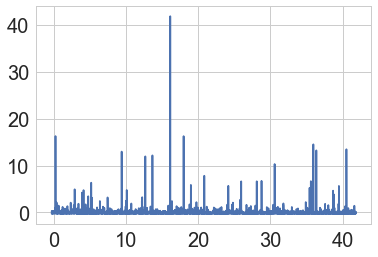

In [67]:
x = (CustomerTable['NumberItems'] - CustomerTable['NumberItems'].mean()) / CustomerTable['NumberItems'].std()
plt.plot(np.linspace(-0.3050305679491978, 41.858, len(x) ) ,x)

In [68]:
x

0      -0.240187
1       0.285837
2       0.260798
3      -0.105150
4      -0.198028
5      -0.139605
6      -0.235907
7      -0.126765
8      -0.188826
9       0.100295
10      0.339338
11     -0.187114
12      0.104789
13      0.009129
14     -0.220713
15      0.233192
16     -0.152873
17      0.082104
18     -0.203164
19     -0.203164
20      0.263366
21     -0.113710
22     -0.070267
23     -0.198028
24     -0.166997
25     -0.202308
26     -0.038166
27      0.301031
28     -0.153301
29      0.000782
          ...   
4342    0.140956
4343   -0.204662
4344   -0.132971
4345   -0.212794
4346   -0.197814
4347    1.434187
4348   -0.189040
4349   -0.224351
4350   -0.255167
4351   -0.024042
4352   -0.087388
4353    0.074186
4354   -0.208942
4355   -0.201238
4356    0.073758
4357   -0.173632
4358   -0.240187
4359   -0.225207
4360   -0.219429
4361    0.197239
4362   -0.223067
4363   -0.240187
4364   -0.200810
4365   -0.225849
4366   -0.226063
4367   -0.230557
4368   -0.228631
4369   -0.2192

In [65]:
len(np.linspace(-0.3050305679491978, 41.858, 1000 ))

1000

-0.0015402680981501532